# Histograms

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [51]:
dark_horse = cv2.imread('../DATA/horse.jpg') # Original BGR OPENCV
show_horse = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB) # RGB for Matplotlib

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

Get Histogram of Blue Channel

In [52]:
brick_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])
brick_values.shape

(256, 1)

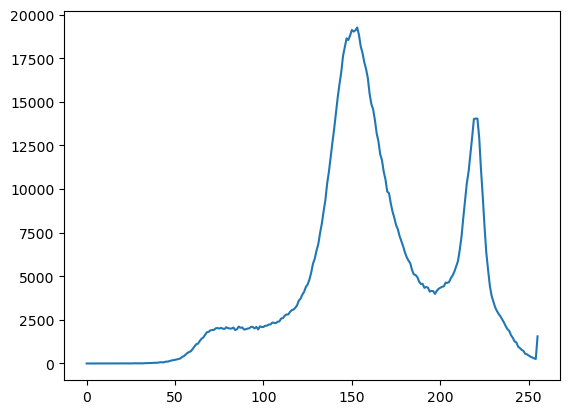

In [53]:
plt.plot(brick_values)

In [54]:
horse_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])
horse_values.shape

(256, 1)

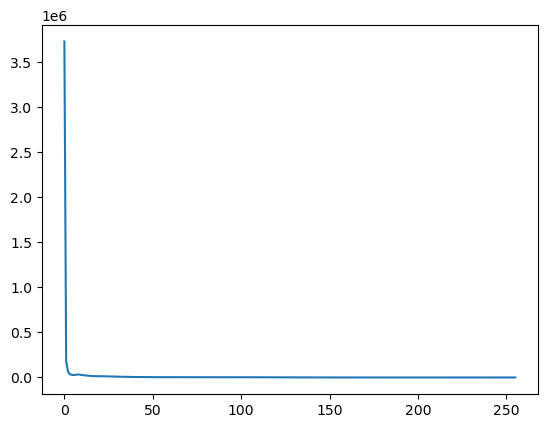

In [55]:
plt.plot(horse_values)

## Plot of All Colors

### Blue Bricks

Text(0.5, 1.0, 'Blue Bricks Histogram')

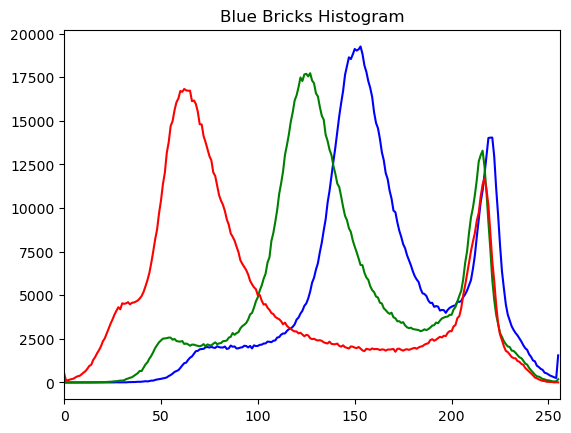

In [56]:
img = blue_bricks
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

plt.title('Blue Bricks Histogram')

### Horse

Text(0.5, 1.0, 'Horse Histogram')

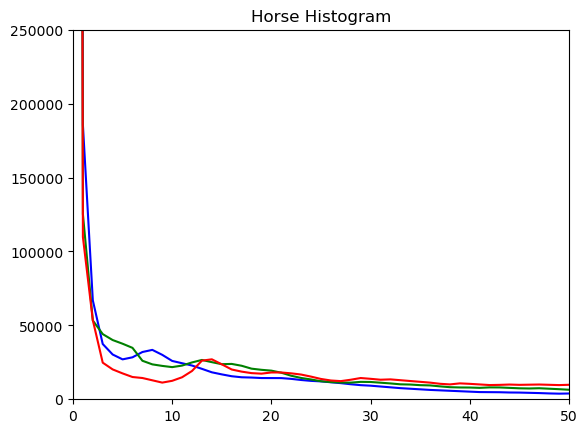

In [57]:
img = dark_horse
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,50])
    plt.ylim([0,250000])

plt.title('Horse Histogram')

## Histogram for Masked Image

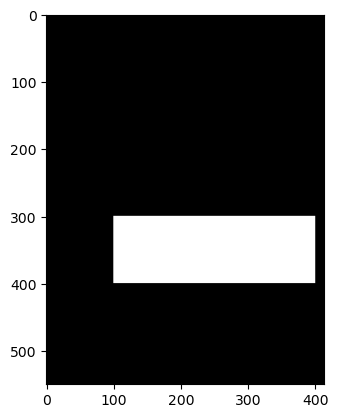

In [58]:
img = rainbow
show_img = show_rainbow
# Create Mask of same image size
mask = np.zeros(img.shape[:2], np.uint8)
# plt.imshow(mask, cmap='gray')
mask[300:400, 100:400] = 255
plt.imshow(mask, cmap='gray')

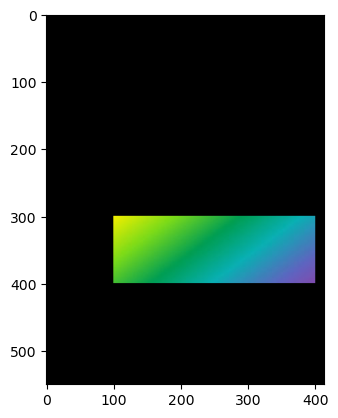

In [59]:
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_img, show_img, mask=mask)
plt.imshow(show_masked_img)

(256, 1)

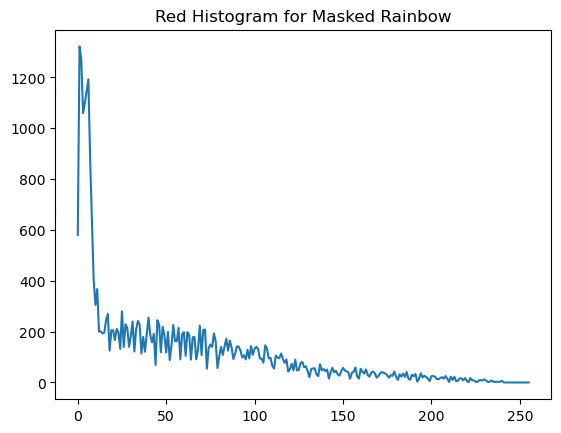

In [66]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
plt.plot(hist_mask_values_red)
plt.title('Red Histogram for Masked Rainbow')

Text(0.5, 1.0, 'Red Histogram for Rainbow')

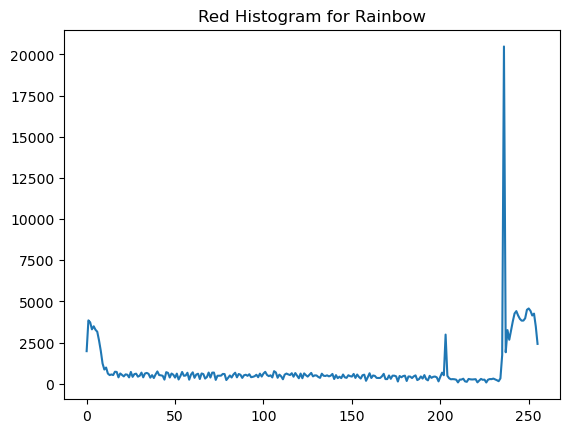

In [65]:
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values_red)
plt.title('Red Histogram for Rainbow')

### Get Total Number of Pixels (from hist)

In [68]:
total_masked_pixels = hist_mask_values_red.sum()
total_masked_pixels

30000.0

In [70]:
total_pixels = hist_values_red.sum()
total_pixels

227150.0

## Histogram Equalization

In [71]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [72]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

### Original Image

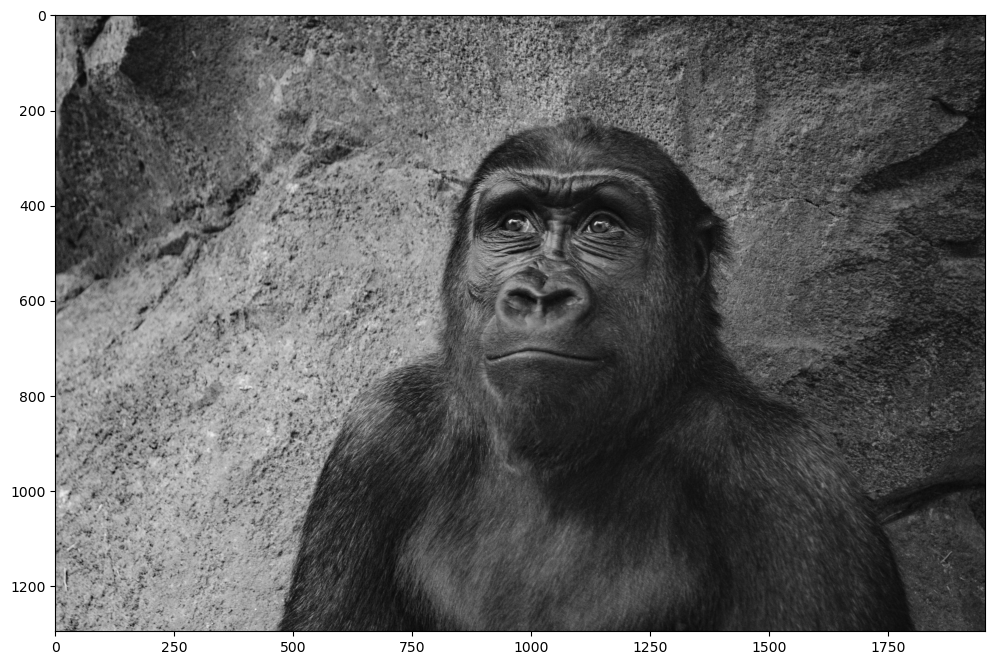

In [73]:
display_img(gorilla, cmap='gray')

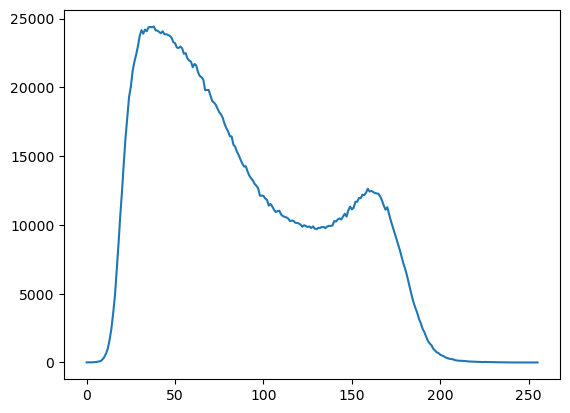

In [77]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values)

### Equalized Image

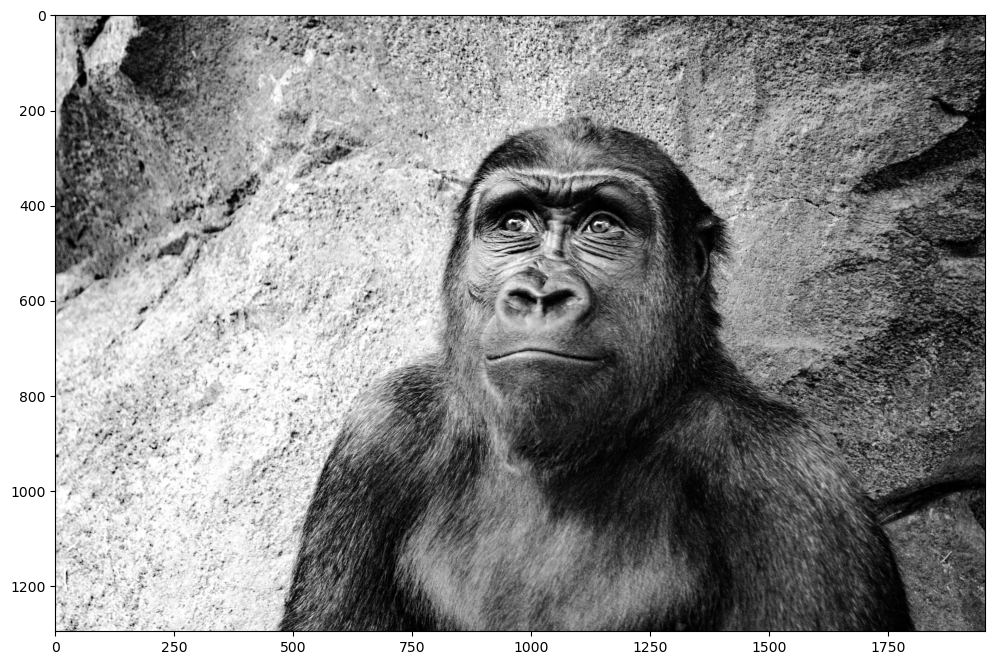

In [78]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_img(eq_gorilla, cmap='gray')

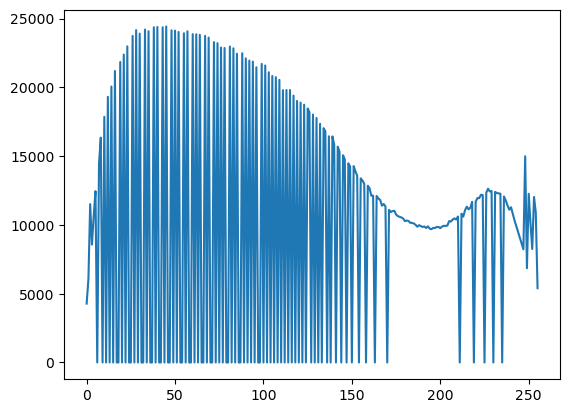

In [80]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values)

### Color Example

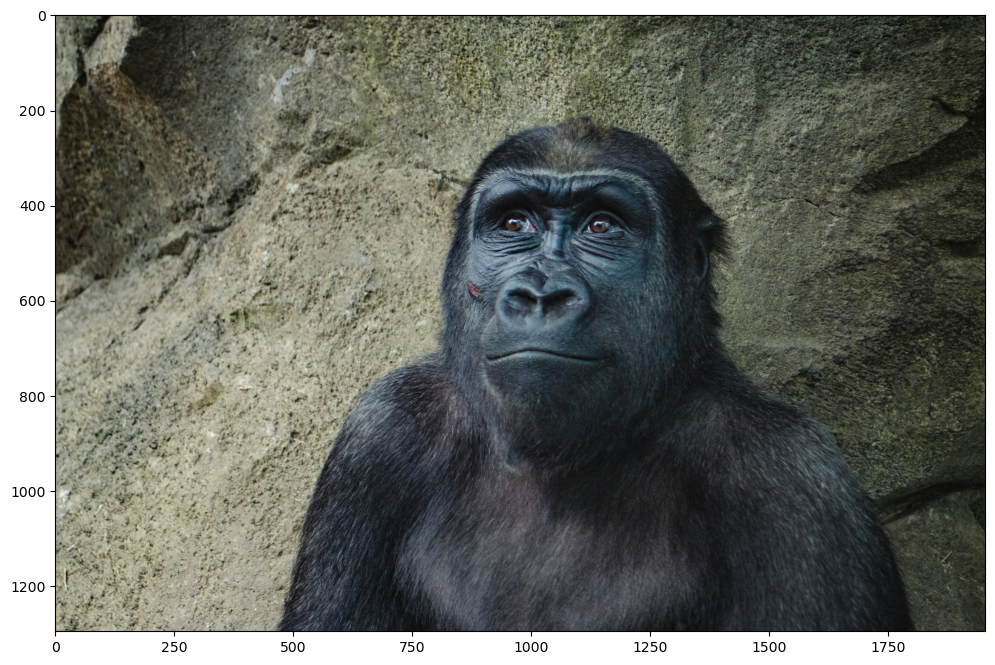

In [81]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
display_img(show_gorilla)

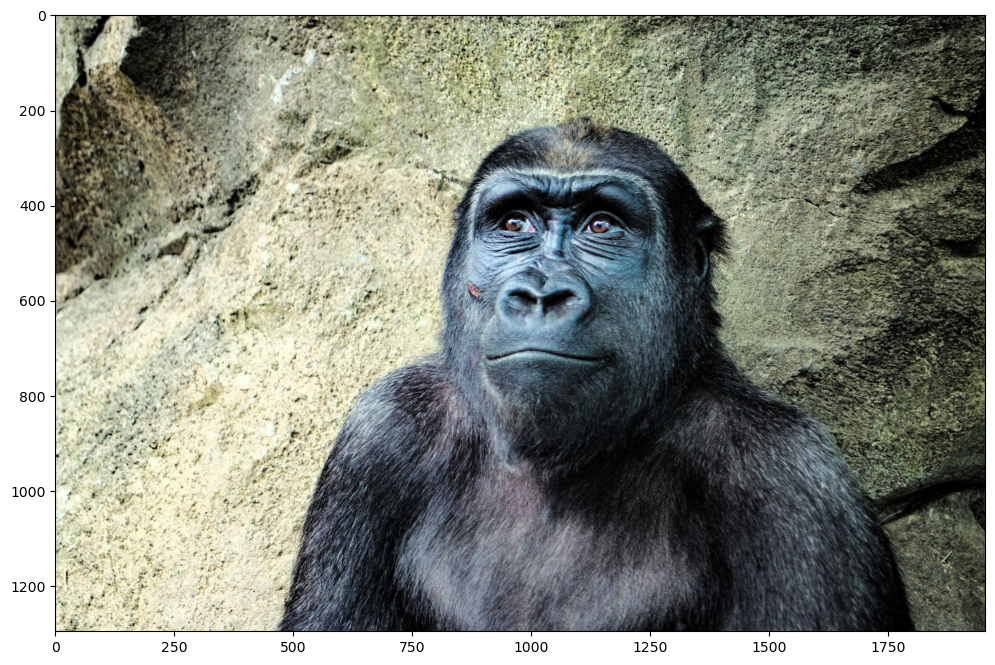

In [83]:
# Convert to HSV
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
equalized_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(equalized_color_gorilla)